데이터 전처리 중 하나인 주성분 분석에 대해 알아본다
데이터가 증가할수록 저장공간은 부족해진다. 그때마다 물리적 디스크를 늘릴 수 없으니 
데이터의 차원을 축소, 핵심적인 부분만 남겨 전처리하는 방식이 주성분분석(principal component analysis)

차원을 축소한다고?
우선 2차원 배열(표)에서 차원은 axs=0(행방향),axs=1(열방향)과 같이 축이 2개 이걸 차원(dimension)이라고 한다.
근데 1차원 배열(한줄~)일 때는 1칸 1칸의 벡터가 차원(dimension)이 된다.

즉, fruits_2d는 1샘플당 10,000개의 벡터=110,000개의 차원을 갖고 있다.
한 샘플당 10,000개의 차원(벡터)가 있다면 데이터 저장하는데 부하가 걸리겠지?
그러니 샘플에서 중요한 요소만 골라 저장하는거, 부피를 줄이는거
그게 차원축소 pca 분석이다
pca 분석은 분산이 큰 방향을 찾는것으로 샘플 1과 2를 잘 구분할 수 있는, 분산이 큰 방향을 찾는 분석법이다

주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
-> 이게 무슨 말인가...
**주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다! 
**첫번째 주성분이 제일 큰 분산을 가진다

In [1]:
!wget http://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2025-11-10 16:14:38--  http://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-11-10 16:14:38--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-11-10 16:14:38--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [3]:
print(pca.components_.shape)

(50, 10000)


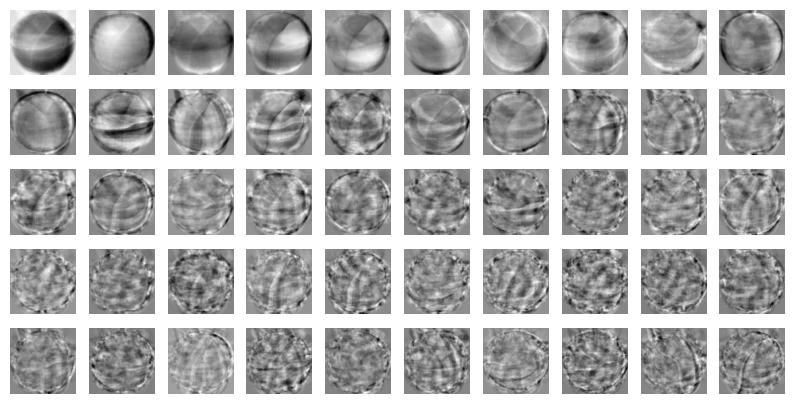

In [9]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols=n if rows < 2 else 10
    fig, axs = plt. subplots(rows, cols,
                             figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
                axs[i,j].axis('off')
plt.show()
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [12]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


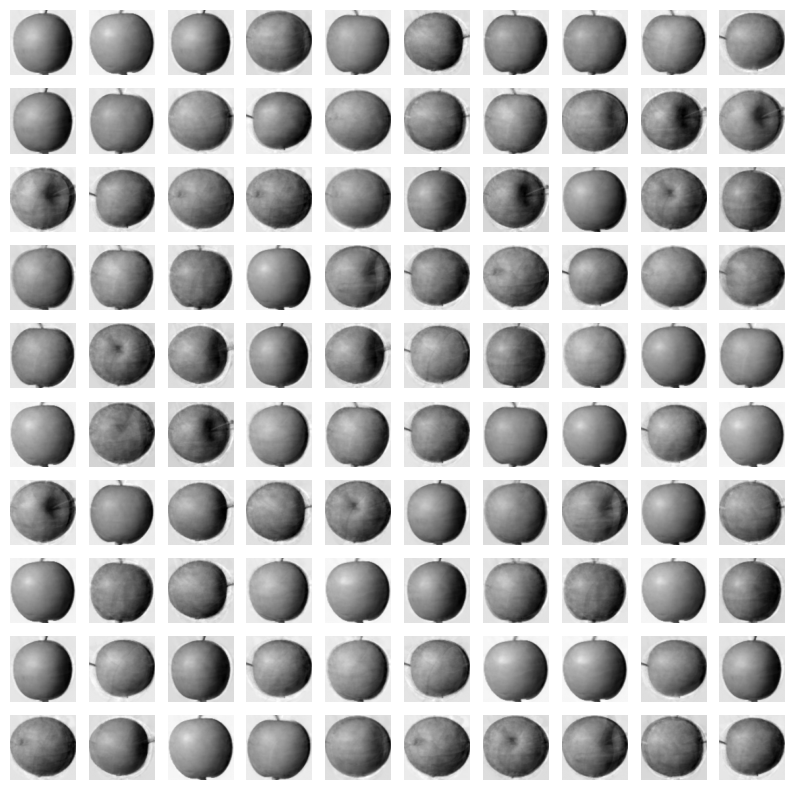

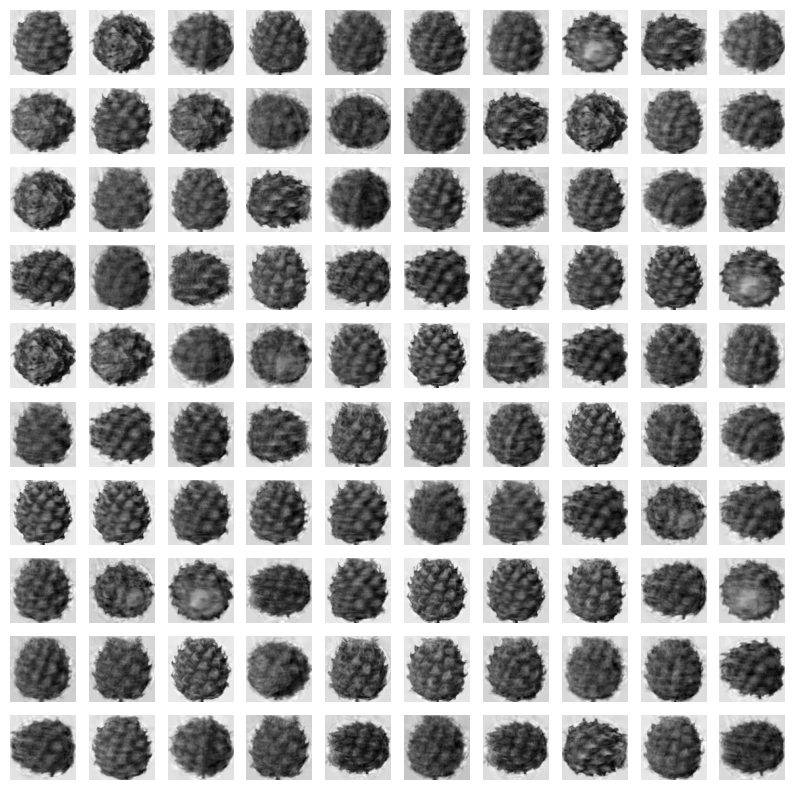

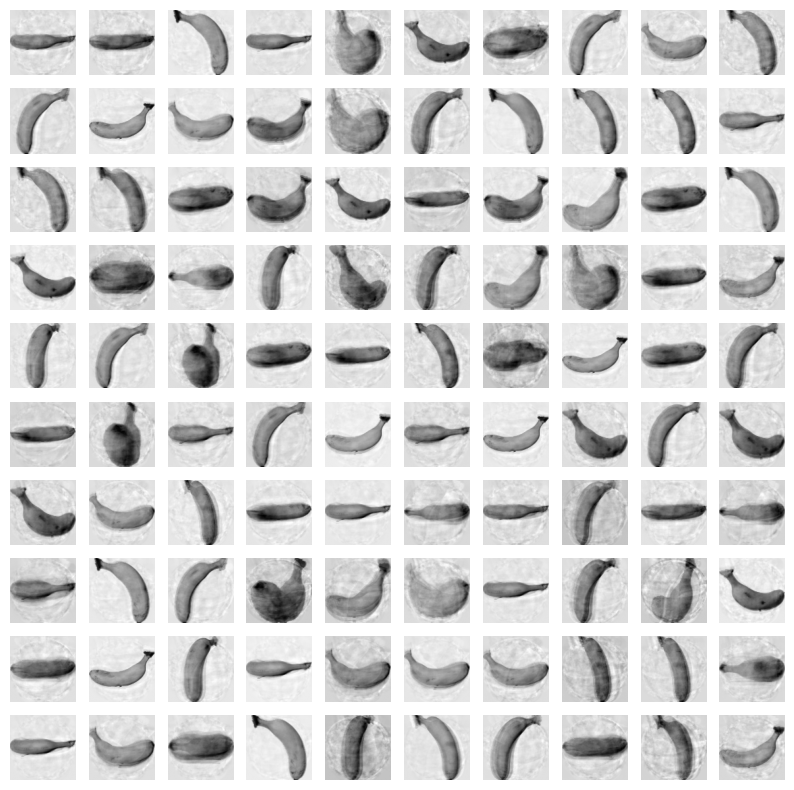

In [ ]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
#print("\n")은 각 묶음 사이에 빈 줄을 출력해 구분한다.

In [17]:
print(np.sum(pca.explained_variance_ratio_))

0.9214908493790362


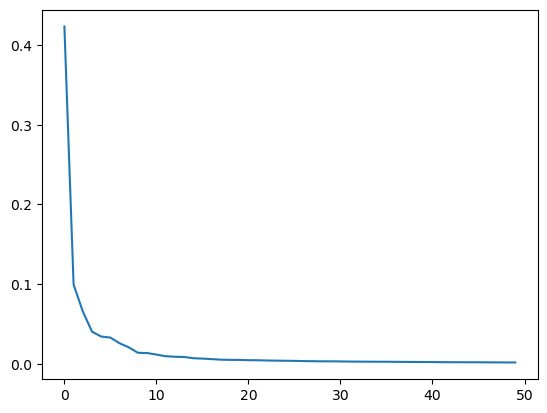

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [20]:
target=np.array([0]*100+[1]*100+[2]*100)

In [21]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.10518522262573242


In [22]:
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.007680559158325195


In [23]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [24]:
print(pca.n_components_)

2


In [25]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [26]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.012560558319091798


/home/user1/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user1/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

In [27]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


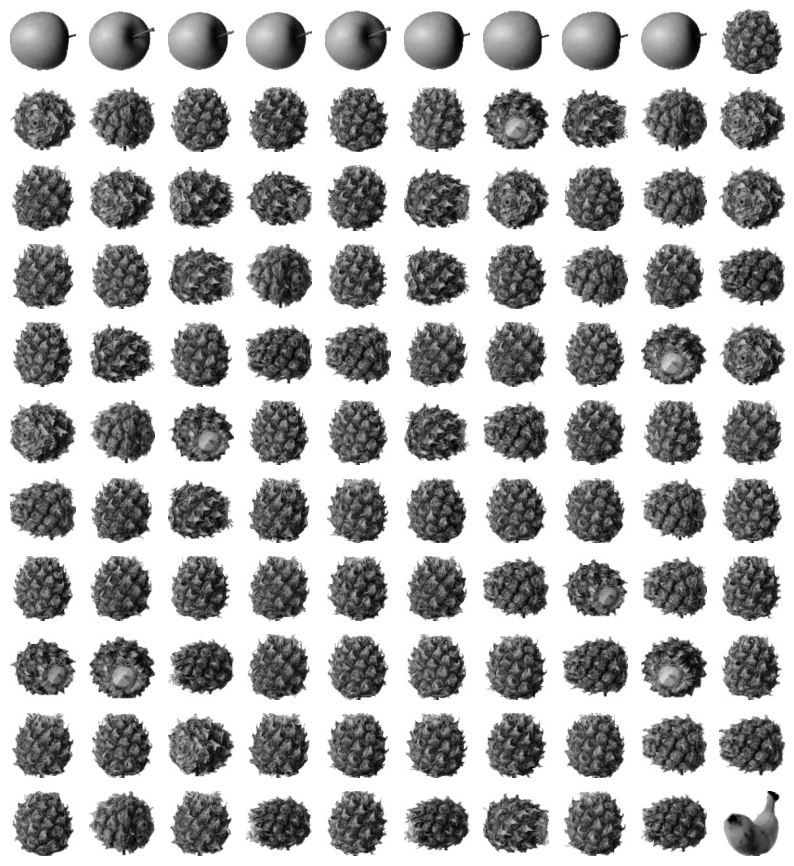

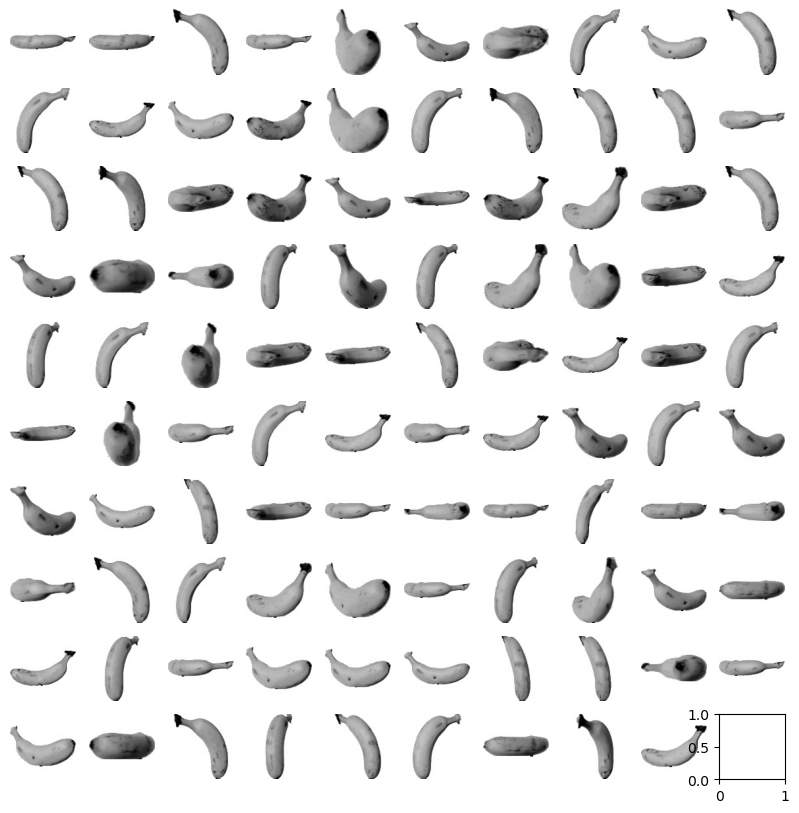

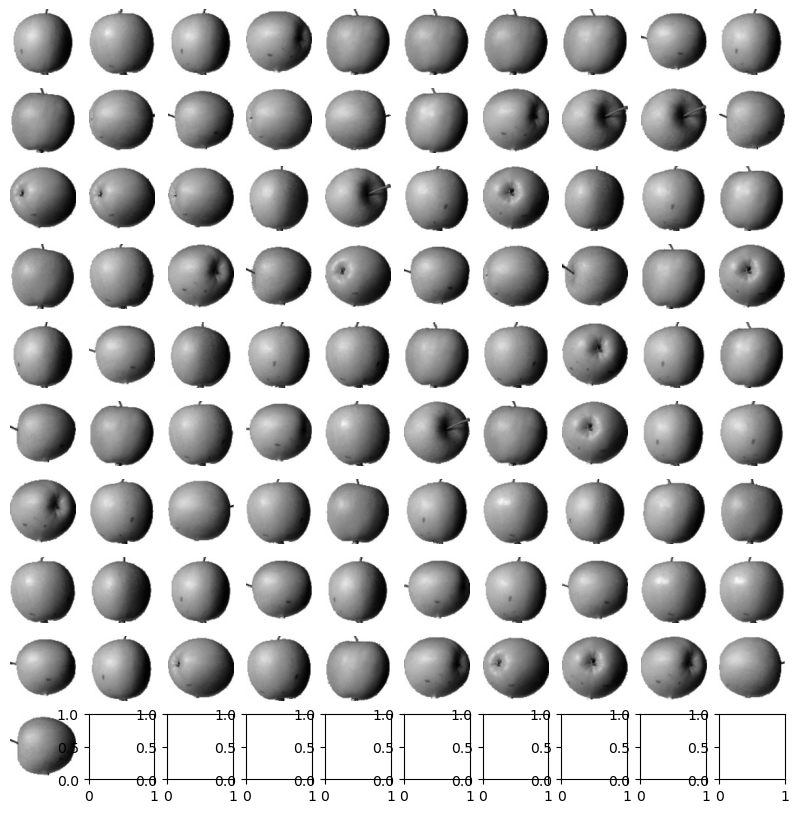

In [28]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

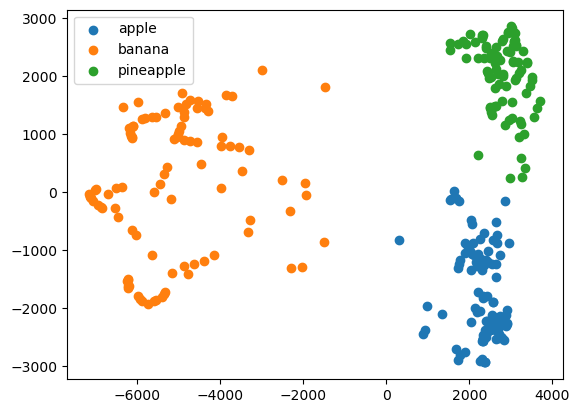

In [31]:
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()